# Problème: projection sur les vecteurs croissants

<br/>
<font color='red'><b> Le fichier doit être copié sur l'ordinateur et renommé M315-NUMERODECOPIE</b> </font>

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\Vert#1\Vert}$

Dans toute la suite, on supposera que $n=30$. On prendra pour vecteur $y$ celui donné ci-dessous. La solution du problème de minimisation (P) a été calculée et est stockée dans le vecteur xsol (ce qui permettra d'étudier la vitesse de convergence des deux algorithmes considérés):

** NUMERO DE COPIE: ** (à compléter)

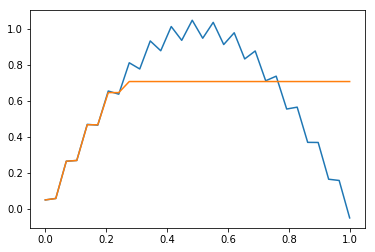

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 30
t = np.linspace(0,1,n)
y = np.sin(np.pi*t) + 0.05*((-1)*np.ones(n))**np.arange(0,n)
xsol = [0.05, 0.05811901842394177, 0.2649704402110241, 0.26930153013598, 0.4677214793686432, 0.4677214793686432,
        0.6464368370235942, 0.6464368370235942, 0.7078730506579234, 0.7078730506579234, 0.7078730506579218,
        0.7078730506579214, 0.7078730506579185, 0.7078730506579184, 0.7078730506579138, 0.7078730506579139,
        0.7078730506579083, 0.7078730506579083, 0.7078730506579022, 0.7078730506579018, 0.7078730506578964,
        0.7078730506578963, 0.7078730506578907, 0.707873050657891, 0.7078730506578864, 0.7078730506578865,
        0.7078730506578831, 0.7078730506578829, 0.7078730506578809, 0.707873050657881]

plt.plot(t,y)
plt.plot(t,xsol)

## Première approche: paramétrisation et gradient projeté

**QN1.** Calculer la matrice $A$ décrite dans le sujet. Écrire une fonction calculant la projection d'un vecteur $z\in \Rsp^n$ sur le convexe $L = \Rsp\times \Rsp_+^{n-1}$.

In [2]:
A = np.eye(n)
for i in range (n):
    for j in range (n):
        if (j<i):
            A[i,j] = 1

In [3]:
def proj(z):
    z2 = z.copy()
    z2[1:] = np.maximum(0,z[1:])
    return z2

**QN2** Implémenter l'algorithme de gradient projeté décrit dans la première partie du sujet:
- Le pas de temps $\tau$ sera choisi égal à $1/\Lambda_A$ (on rappelle *np.linalg.eigh(B)[0]* permet de calculer les valeurs propres d'une matrice symétrique B).
- On effectuera $N = 30000$ itérations, et on tracera la courbe d'erreur $k \mapsto \nr{x^{(k)} - xsol}$ en échelle logarithmique.

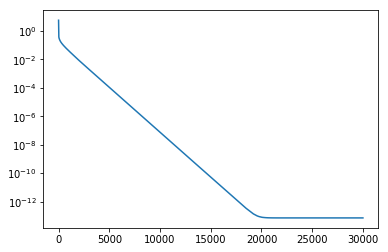

In [4]:
N = 30000
z = np.random.rand(n)
e = np.zeros(N)
τ = 1/(np.max(np.linalg.eigh(np.dot(A.T,A))[0]))
for i in range(N):
    d = -2*(np.dot(A.T,np.dot(A,z)) - np.dot(A.T,y))
    z = proj(z +τ*d)
    x = np.dot(A,z)
    e[i]=np.linalg.norm(x - xsol)
plt.figure()
plt.semilogy(e)

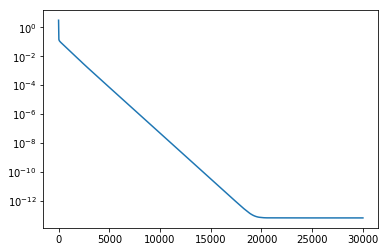

In [5]:
LambdaA = np.max(np.linalg.eigh(np.dot(A,A.T))[0])

tau = 1/LambdaA

niter = 30000
z = np.zeros(n)
e = np.zeros(niter)
for i in range(niter):
    d = - 2*(np.dot(A.T, np.dot(A,z)) - np.dot(A.T,y))
    z = proj(z + tau * d)
    x = np.dot(A,z)
    e[i] = np.linalg.norm(x - xsol)
    
plt.figure()
plt.semilogy(e)

**QN3** Montrer que si $\tau>\Lambda_A$, alors l'algorithme devient instable.

In [6]:
print(1.15/(np.max(np.linalg.eigh(np.dot(A.T,A))[0])) )


0.0030495932648898325


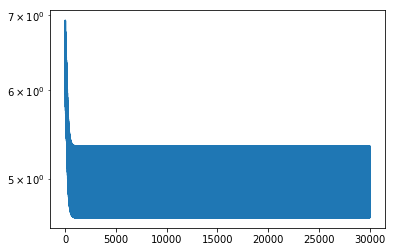

In [7]:
z = np.random.rand(n)
e = np.zeros(N)
τ = 1.15/(np.max(np.linalg.eigh(np.dot(A.T,A))[0]))
for i in range(N):
    d = -2*(np.dot(A.T,np.dot(A,z)) - np.dot(A.T,y))
    z = proj(z +τ*d)
    x = np.dot(A,z)
    e[i]=np.linalg.norm(x - xsol)
plt.figure()
plt.semilogy(e)

## Deuxième approche: dualité algorithme d'Uzawa

**QN4.** Calculer la matrice $D$ décrite dans le sujet. Écrire une fonction projP calculant la projection d'un vecteur $\lambda \in \Rsp^n$ sur $\Rsp_+^{n-1}$.

In [16]:
D = np.eye(n-1,n) - np.eye(n-1,n,1)
print(np.shape(D))
t = np.arange(1,10)
print(t[:-1])

(29, 30)
[1 2 3 4 5 6 7 8]


In [12]:
def projP(λ):
    return np.maximum(λ[:-1],0)

**QN5** Implémenter l'algorithme d'Uzawa décrit dans la deuxième partie du sujet:
- Le pas de temps $\tau$ sera choisi égal à $1$ 
- On effectuera $N = 3000$ itérations, et on tracera la courbe d'erreur $k \mapsto \nr{x^{(k)} - xsol}$ en échelle logarithmique.

Dans une deuxième figure, illustrer l'instabilité de l'algorithme d'Uzawa pour $\tau > 1$.

In [18]:
τ = 1
N = 3000
e = np.zeros(N)
λ = np.random.rand(n)
for i in range(N):
    x = y - 0.5*D.T*λ
    d = D*x
    λ = projP(λ + τ*d)
    e[i] = np.linalg.norm(x - xsol)
plt.figure()
plt.semilogy(e)

ValueError: operands could not be broadcast together with shapes (30,29) (30,) 